### 3. Logical Operators

Symbol | Expression | Meaning
---------|-------|----------
exclamation | !e1 | not e1
ampersand | e1&e2 | a1 and e2 (high precedence)
comma | e1,e2 | e1 or e2
semicolon | e1;e2 | e1 and e2 (low precedence)

Logical Operators 는 반드시 `[ ] (Bracket)` 로 감싸준다.

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [2]:
mol1 = Chem.MolFromSmiles('c1ccccc1')
mol2 = Chem.MolFromSmiles('CCCCCC')
mol3 = Chem.MolFromSmiles('C1CCCCC1')

my_mol = [mol1,
          mol2,
          mol3
         ]

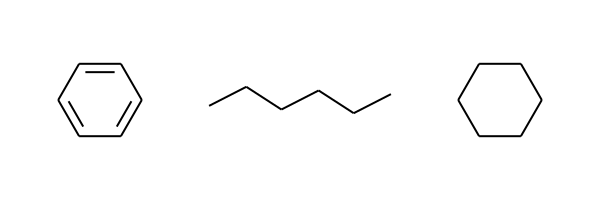

In [3]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [4]:
# not aromatic
noaromatic = Chem.MolFromSmarts('[!c]')

In [5]:
[mol.HasSubstructMatch(noaromatic) for mol in my_mol]

[False, True, True]

In [6]:
# Ring O / X
no1 = Chem.MolFromSmarts('[R]')

In [7]:
[mol.HasSubstructMatch(no1) for mol in my_mol]

[True, False, True]

In [8]:
# And ( HIgh precedence )
no2 = Chem.MolFromSmarts('[!c&R]')

In [9]:
[mol.HasSubstructMatch(no2) for mol in my_mol]

[False, False, True]

In [10]:
# Or
no3 = Chem.MolFromSmarts('[!c,R]')

In [11]:
[mol.HasSubstructMatch(no3) for mol in my_mol]

[True, True, True]

In [12]:
# And ( low precedence )
no4 = Chem.MolFromSmarts('[!c;R]')

In [13]:
[mol.HasSubstructMatch(no4) for mol in my_mol]

[False, False, True]

### 4. Recursive SMARTS  (  ` $ ` )

` $(SMARTS) ` 


In [14]:
mol1 = Chem.MolFromSmiles('c1c(O)c(N)ccc1')
mol2 = Chem.MolFromSmiles('c1c(O)cc(N)cc1')
mol3 = Chem.MolFromSmiles('c1c(O)ccc(N)c1')

my_mol = [mol1,
          mol2,
          mol3
         ]

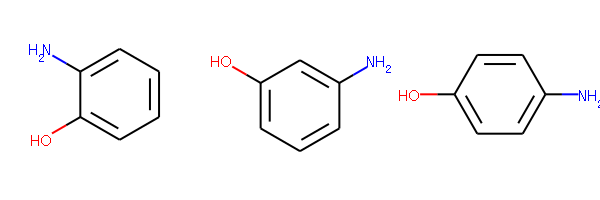

In [15]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [16]:
no6 = Chem.MolFromSmarts('[#6]aaO')     # Ortho 'O'
[mol.HasSubstructMatch(no6) for mol in my_mol]

[True, True, True]

In [17]:
no7 = Chem.MolFromSmarts('[#6]aaaN')    # Meta 'N'
[mol.HasSubstructMatch(no7) for mol in my_mol]

[True, True, True]

In [18]:
no8 = Chem.MolFromSmarts('[#6]aa(O)aN')      # Ortho 'O' + Meta 'N'   ( only 2nd O, 3rd N)
[mol.HasSubstructMatch(no8) for mol in my_mol]

[True, False, False]

In [19]:
no9 = Chem.MolFromSmarts('[#6][$(aaO);$(aaaN)]')     # 기준이 되는 [#6] 이 같다
[mol.HasSubstructMatch(no9) for mol in my_mol]

[True, False, True]

### 5. Component-level grouping of SMARTS

<br>

```
SMARTS.SMARTS
(SMARTS).(SMARTS)
(SMARTS.SMARTS)
```


In [20]:
mol1 = Chem.MolFromSmiles('O=O')
mol2 = Chem.MolFromSmiles('OCCO')
mol3 = Chem.MolFromSmiles('O.CCO')

my_mol = [mol1,
          mol2,
          mol3
         ]

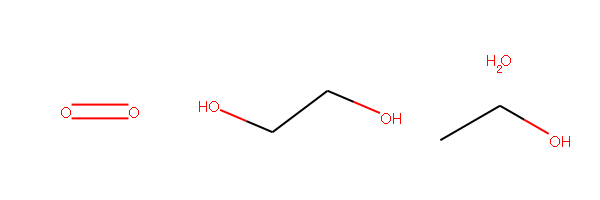

In [21]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [22]:
no10 = Chem.MolFromSmarts('[#8].[#8]')
[mol.HasSubstructMatch(no10) for mol in my_mol]

[True, True, True]

In [23]:
no11 = Chem.MolFromSmarts('([#8].[#8])')
#[mol.HasSubstructMatch(no11) for mol in my_mol]

In [24]:
no12 = Chem.MolFromSmarts('([#8]).([#8])')
#[mol.HasSubstructMatch(no12) for mol in my_mol]